In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [25]:
dataset = pd.read_csv('/content/iris.csv')
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


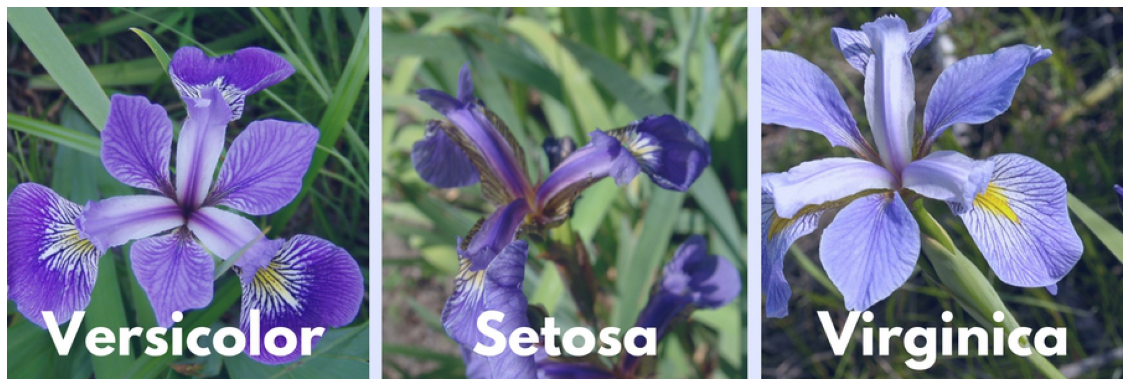

In [31]:
img=mpimg.imread('iris_types.jpg')
plt.figure(figsize=(20,40))
plt.axis('off')
plt.imshow(img)

In [32]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
# # # #Initiating the variables
# X = dataset.drop(['species'], axis = 1)
# y = dataset['species'].values.reshape(-1,1)

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [15]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test

array([[ 1.05289739,  0.57732958,  1.10969715,  1.19627649],
       [-0.03526451, -0.55840074,  0.7666392 ,  1.5965177 ],
       [-0.76070577,  2.3944981 , -1.29170844, -1.47199821],
       [-1.36524016,  0.35018352, -1.40606109, -1.33858448],
       [-1.00251953,  0.80447565, -1.23453212, -1.07175701],
       [ 1.05289739, -0.10410861,  0.70946288,  0.66262155],
       [ 0.08564237, -0.10410861,  0.25205229,  0.39579408],
       [ 1.17380427, -0.55840074,  0.59511023,  0.26238035],
       [ 0.20654925, -1.92127713,  0.70946288,  0.39579408],
       [ 0.56926988, -1.23983894,  0.65228656,  0.39579408],
       [ 0.93199052, -0.33125468,  0.48075759,  0.12896661],
       [ 0.32745613, -1.01269287,  1.05252082,  0.26238035],
       [-0.88161265,  1.71305991, -1.06300315, -1.07175701],
       [-0.51889202,  0.80447565, -1.1773558 , -1.33858448],
       [-1.00251953,  0.80447565, -1.29170844, -1.33858448],
       [-1.84886767, -0.10410861, -1.52041374, -1.47199821],
       [ 1.17380427, -0.

#Using Linear Kernel

In [16]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear')
svcclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [33]:
# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


0.9666666666666667

#Using polynomial kernel

In [33]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly')
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


0.9666666666666667

#Using rbf Kernel

In [37]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf')
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


0.9333333333333333

#Using sigmoid kernel

In [39]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid')
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0  4  5]
 [ 0  0 10]]


0.8333333333333334

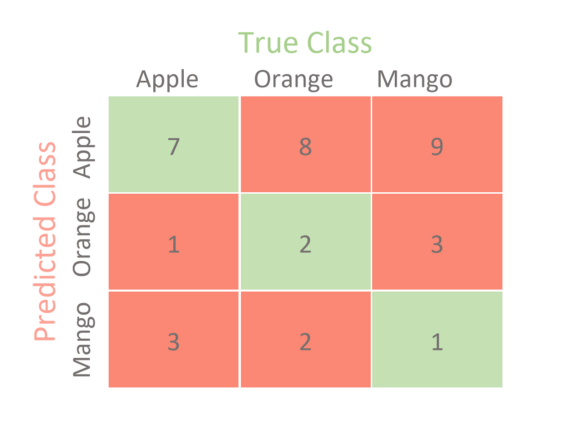

In [39]:
img=mpimg.imread('/content/Confusion_Metrix3Class.png')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)